In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
keras.__version__

'2.2.4-tf'

In [3]:
rawData = pd.read_csv("housing.csv")

In [4]:
rawData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
rawData.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


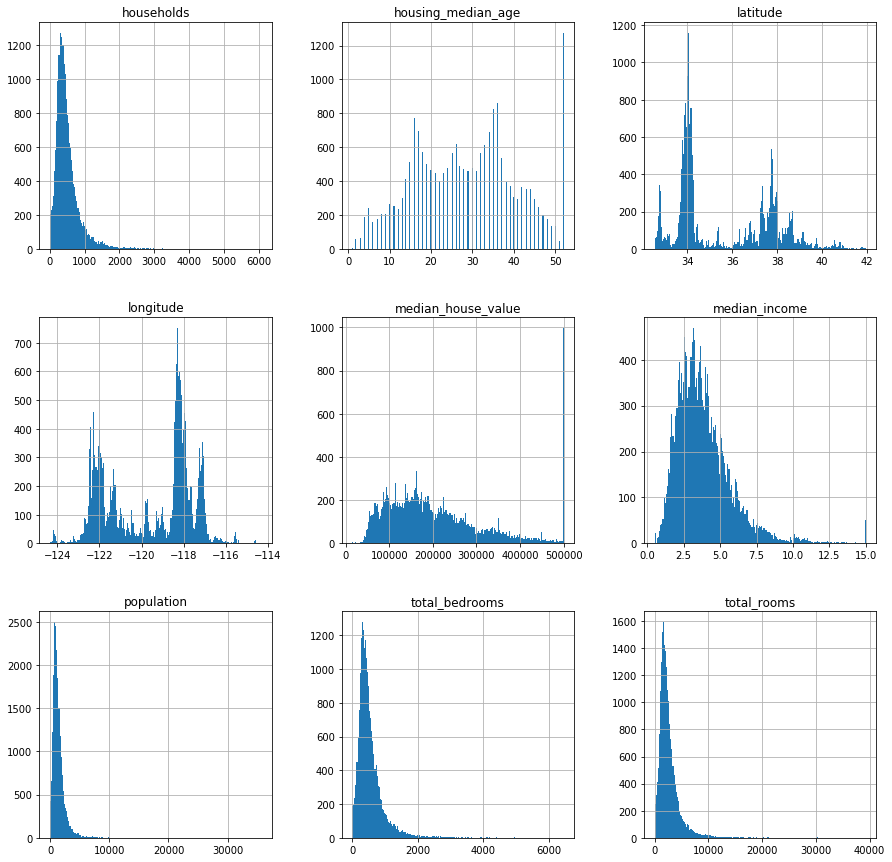

In [6]:
rawData.hist(bins=200, figsize=(15,15))
plt.show()

# Deep Learning

In [7]:
#clean Data
#Scrub the data, remove entries that are missing data
filteredData = rawData.dropna(subset=["total_bedrooms"])
filteredData = filteredData.dropna(subset=["latitude"])
filteredData = filteredData.dropna(subset=["longitude"])
filteredData = filteredData.dropna(subset=["housing_median_age"])
filteredData = filteredData.dropna(subset=["total_rooms"])
filteredData = filteredData.dropna(subset=["total_bedrooms"])
filteredData = filteredData.dropna(subset=["households"])
filteredData = filteredData.dropna(subset=["median_income"])
filteredData = filteredData.dropna(subset=["median_house_value"])
filteredData = filteredData.dropna(subset=["ocean_proximity"])


In [8]:
filteredData.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
filteredData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
inputs = filteredData.drop(columns=["median_house_value", "latitude", "longitude", "ocean_proximity"]) #removing house value because its output, lat and long as a test and ocean proximity because its categorical

In [11]:
outputs = filteredData["median_house_value"]

In [12]:
inputs.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,41.0,880.0,129.0,322.0,126.0,8.3252
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,52.0,1467.0,190.0,496.0,177.0,7.2574
3,52.0,1274.0,235.0,558.0,219.0,5.6431
4,52.0,1627.0,280.0,565.0,259.0,3.8462


In [13]:
outputs.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [64]:
model = keras.Sequential()

In [65]:
model.add(keras.layers.Dense(100, activation="relu", input_shape=(6,))) #We have 6 inputs: age, room, beds, population, households, income

In [66]:
model.add(keras.layers.Dense(100, activation="relu")) #middle hidden layer
model.add(keras.layers.Dense(100, activation="relu")) #middle hidden layer

In [67]:
model.add(keras.layers.Dense(1)) # 1 output layer

In [68]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [69]:
model.fit(inputs, outputs, epochs=500, batch_size=500)

Train on 20433 samples
Epoch 1/500
20433/20433 [==============================] - 2s 108us/sample - loss: 53712661290.9611
Epoch 2/500
20433/20433 [==============================] - 1s 52us/sample - loss: 34298049219.1228
Epoch 3/500
20433/20433 [==============================] - 1s 49us/sample - loss: 27596440461.7879
Epoch 4/500
20433/20433 [==============================] - 1s 49us/sample - loss: 27275720839.6112
Epoch 5/500
20433/20433 [==============================] - 1s 53us/sample - loss: 27017812628.4156
Epoch 6/500
20433/20433 [==============================] - 1s 50us/sample - loss: 26739137201.6828
Epoch 7/500
20433/20433 [==============================] - 1s 52us/sample - loss: 26547634923.2148
Epoch 8/500
20433/20433 [==============================] - 1s 52us/sample - loss: 25993893545.11310s - loss: 2592727273
Epoch 9/500
20433/20433 [==============================] - 1s 52us/sample - loss: 25505147969.8010
Epoch 10/500
20433/20433 [==============================] - 1s 4

20433/20433 [==============================] - 1s 46us/sample - loss: 5049895151.0737
Epoch 165/500
20433/20433 [==============================] - 1s 47us/sample - loss: 4969580127.6194
Epoch 166/500
20433/20433 [==============================] - 1s 53us/sample - loss: 4943388497.8503
Epoch 167/500
20433/20433 [==============================] - 1s 48us/sample - loss: 4971480045.1317
Epoch 168/500
20433/20433 [==============================] - 1s 52us/sample - loss: 4973590169.2266
Epoch 169/500
20433/20433 [==============================] - 1s 46us/sample - loss: 4914952267.9493
Epoch 170/500
20433/20433 [==============================] - 1s 52us/sample - loss: 4931258490.9071
Epoch 171/500
20433/20433 [==============================] - 1s 48us/sample - loss: 4962004576.5716
Epoch 172/500
20433/20433 [==============================] - 1s 51us/sample - loss: 4913668645.3357
Epoch 173/500
20433/20433 [==============================] - 1s 50us/sample - loss: 4959968517.8635
Epoch 174/500


20433/20433 [==============================] - 1s 48us/sample - loss: 4726518347.4231
Epoch 328/500
20433/20433 [==============================] - 1s 50us/sample - loss: 4732498176.1128
Epoch 329/500
20433/20433 [==============================] - 1s 45us/sample - loss: 4734950075.6055
Epoch 330/500
20433/20433 [==============================] - 1s 51us/sample - loss: 4780597552.6993
Epoch 331/500
20433/20433 [==============================] - 1s 54us/sample - loss: 4759286912.8457
Epoch 332/500
20433/20433 [==============================] - 1s 47us/sample - loss: 4726325056.1597
Epoch 333/500
20433/20433 [==============================] - 1s 51us/sample - loss: 4703901449.1710
Epoch 334/500
20433/20433 [==============================] - 1s 40us/sample - loss: 4838452690.4455
Epoch 335/500
20433/20433 [==============================] - 1s 43us/sample - loss: 4723925591.2252
Epoch 336/500
20433/20433 [==============================] - 1s 49us/sample - loss: 4702916608.8770
Epoch 337/500


Epoch 409/500
20433/20433 [==============================] - 1s 59us/sample - loss: 4635434218.1123
Epoch 410/500
20433/20433 [==============================] - 1s 52us/sample - loss: 4620730354.6694
Epoch 411/500
20433/20433 [==============================] - 1s 52us/sample - loss: 4698306763.6799
Epoch 412/500
20433/20433 [==============================] - 1s 44us/sample - loss: 4651981193.0270
Epoch 413/500
20433/20433 [==============================] - 1s 53us/sample - loss: 4763408635.4771
Epoch 414/500
20433/20433 [==============================] - 1s 57us/sample - loss: 4729178801.6577
Epoch 415/500
20433/20433 [==============================] - 1s 55us/sample - loss: 4637840636.5671
Epoch 416/500
20433/20433 [==============================] - 1s 62us/sample - loss: 4676478125.3979
Epoch 417/500
20433/20433 [==============================] - 1s 65us/sample - loss: 4653357442.1362
Epoch 418/500
20433/20433 [==============================] - 1s 58us/sample - loss: 4606910909.8231


In [70]:
test1 = np.array([52.0,1274.0,235.0,558.0,219.0,5.6431])
print (model.predict(test1.reshape(1,6), batch_size=1))
print ("Expected 341300.0 ")

[[351554.62]]
Expected 341300.0 


In [71]:
test2 = np.array([52.0,1467.0,190.0,496.0,177.0,7.2574])
print(model.predict(test2.reshape(1,6), batch_size=1))
print("Expected 352100.0")

[[379948.94]]
Expected 352100.0


In [83]:
test3 = np.array([35.0,2073.0,494.0,1753.0,490.0,1.5])
print(model.predict(test3.reshape(1,6), batch_size=1))
print("Expected 93600.0")

[[101715.82]]
Expected 93600


In [89]:
test4 = np.array([8.0,2870.0,526.0,1307.0,451.0,3.463])
print(model.predict(test4.reshape(1,6), batch_size=1))
print("Expected 201700.0")

[[162728.98]]
Expected 201700


In [94]:
test5 = np.array([27.0,3184.0,588.0,1763.0,571.0,3.5529])
print(model.predict(test5.reshape(1,6), batch_size=1))
print("Expected 133900.0")

[[161514.28]]
Expected 133900


In [75]:
test6 = np.array([25.0,1665.0,374.0,845.0,330.0,1.5603])
print(model.predict(test6.reshape(1,6), batch_size=1))
print("Expected 78100.0")

[[89560.02]]
Expected 78100.0


In [97]:
test7 = np.array([18.0,408.0,82.0,253.0,75.0,2.0313])
print(model.predict(test7.reshape(1,6), batch_size=1))
print("Expected 112500.0")

[[87192.68]]
Expected 112500.0


In [77]:
test8 = np.array([17.0,2254.0,485.0,1007.0,433.0,1.7000])
print(model.predict(test8.reshape(1,6), batch_size=1))
print("Expected 92300.0")

[[112426.36]]
Expected 92300.0


In [98]:
test9 = np.array([44.0,1513.0,369.0,1088.0,344.0, 1.2969])
print(model.predict(test9.reshape(1,6), batch_size=1))
print("Expected 94400.0")

[[89745.57]]
Expected 94400


In [105]:
test10 = np.array([26.0,745.0,258.0,694.0,236.0, 1.3846])
print(model.predict(test10.reshape(1,6), batch_size=1))
print("Expected 129200.0")

[[118502.26]]
Expected 129200.0
